In [526]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem Statement

Principal Component Analysis

In [527]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Q1. Load the Data file into Python DataFrame and view top 10 rows

In [528]:
pca_df = pd.read_csv("breast_cancer_wisconsin_data.csv",sep=",")

In [529]:
pca_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [530]:
#pca_df = pca_df.drop('ID',axis=1)

In [531]:
pca_df.shape

(699, 11)

In [532]:
pca_df.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

## Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [533]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [534]:
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


## Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [535]:
pca_df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [536]:
pca_df['Bare Nuclei'].value_counts().sum

<bound method Series.sum of 1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64>

In [537]:
pca_df.head(3)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [538]:
pca_df['Bare Nuclei'].replace(to_replace='?',value = '1',inplace=True)

In [539]:
pca_df.shape

(699, 11)

In [540]:
pca_df.head(3)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [541]:
pca_df['Bare Nuclei'].value_counts().sum

<bound method Series.sum of 1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64>

In [542]:
pca_df.duplicated().sum()

9

In [543]:
pca_df.head(3)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [544]:
pca_df.drop_duplicates(keep='first',inplace=True)

In [545]:
pca_df.head(3)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [546]:
pca_df.shape

(690, 11)

## Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


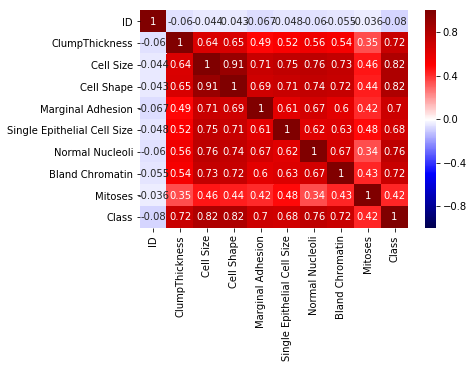

In [547]:
sns.heatmap(pca_df.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

In [548]:
pca_df.head(3)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


C:\Users\isaur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


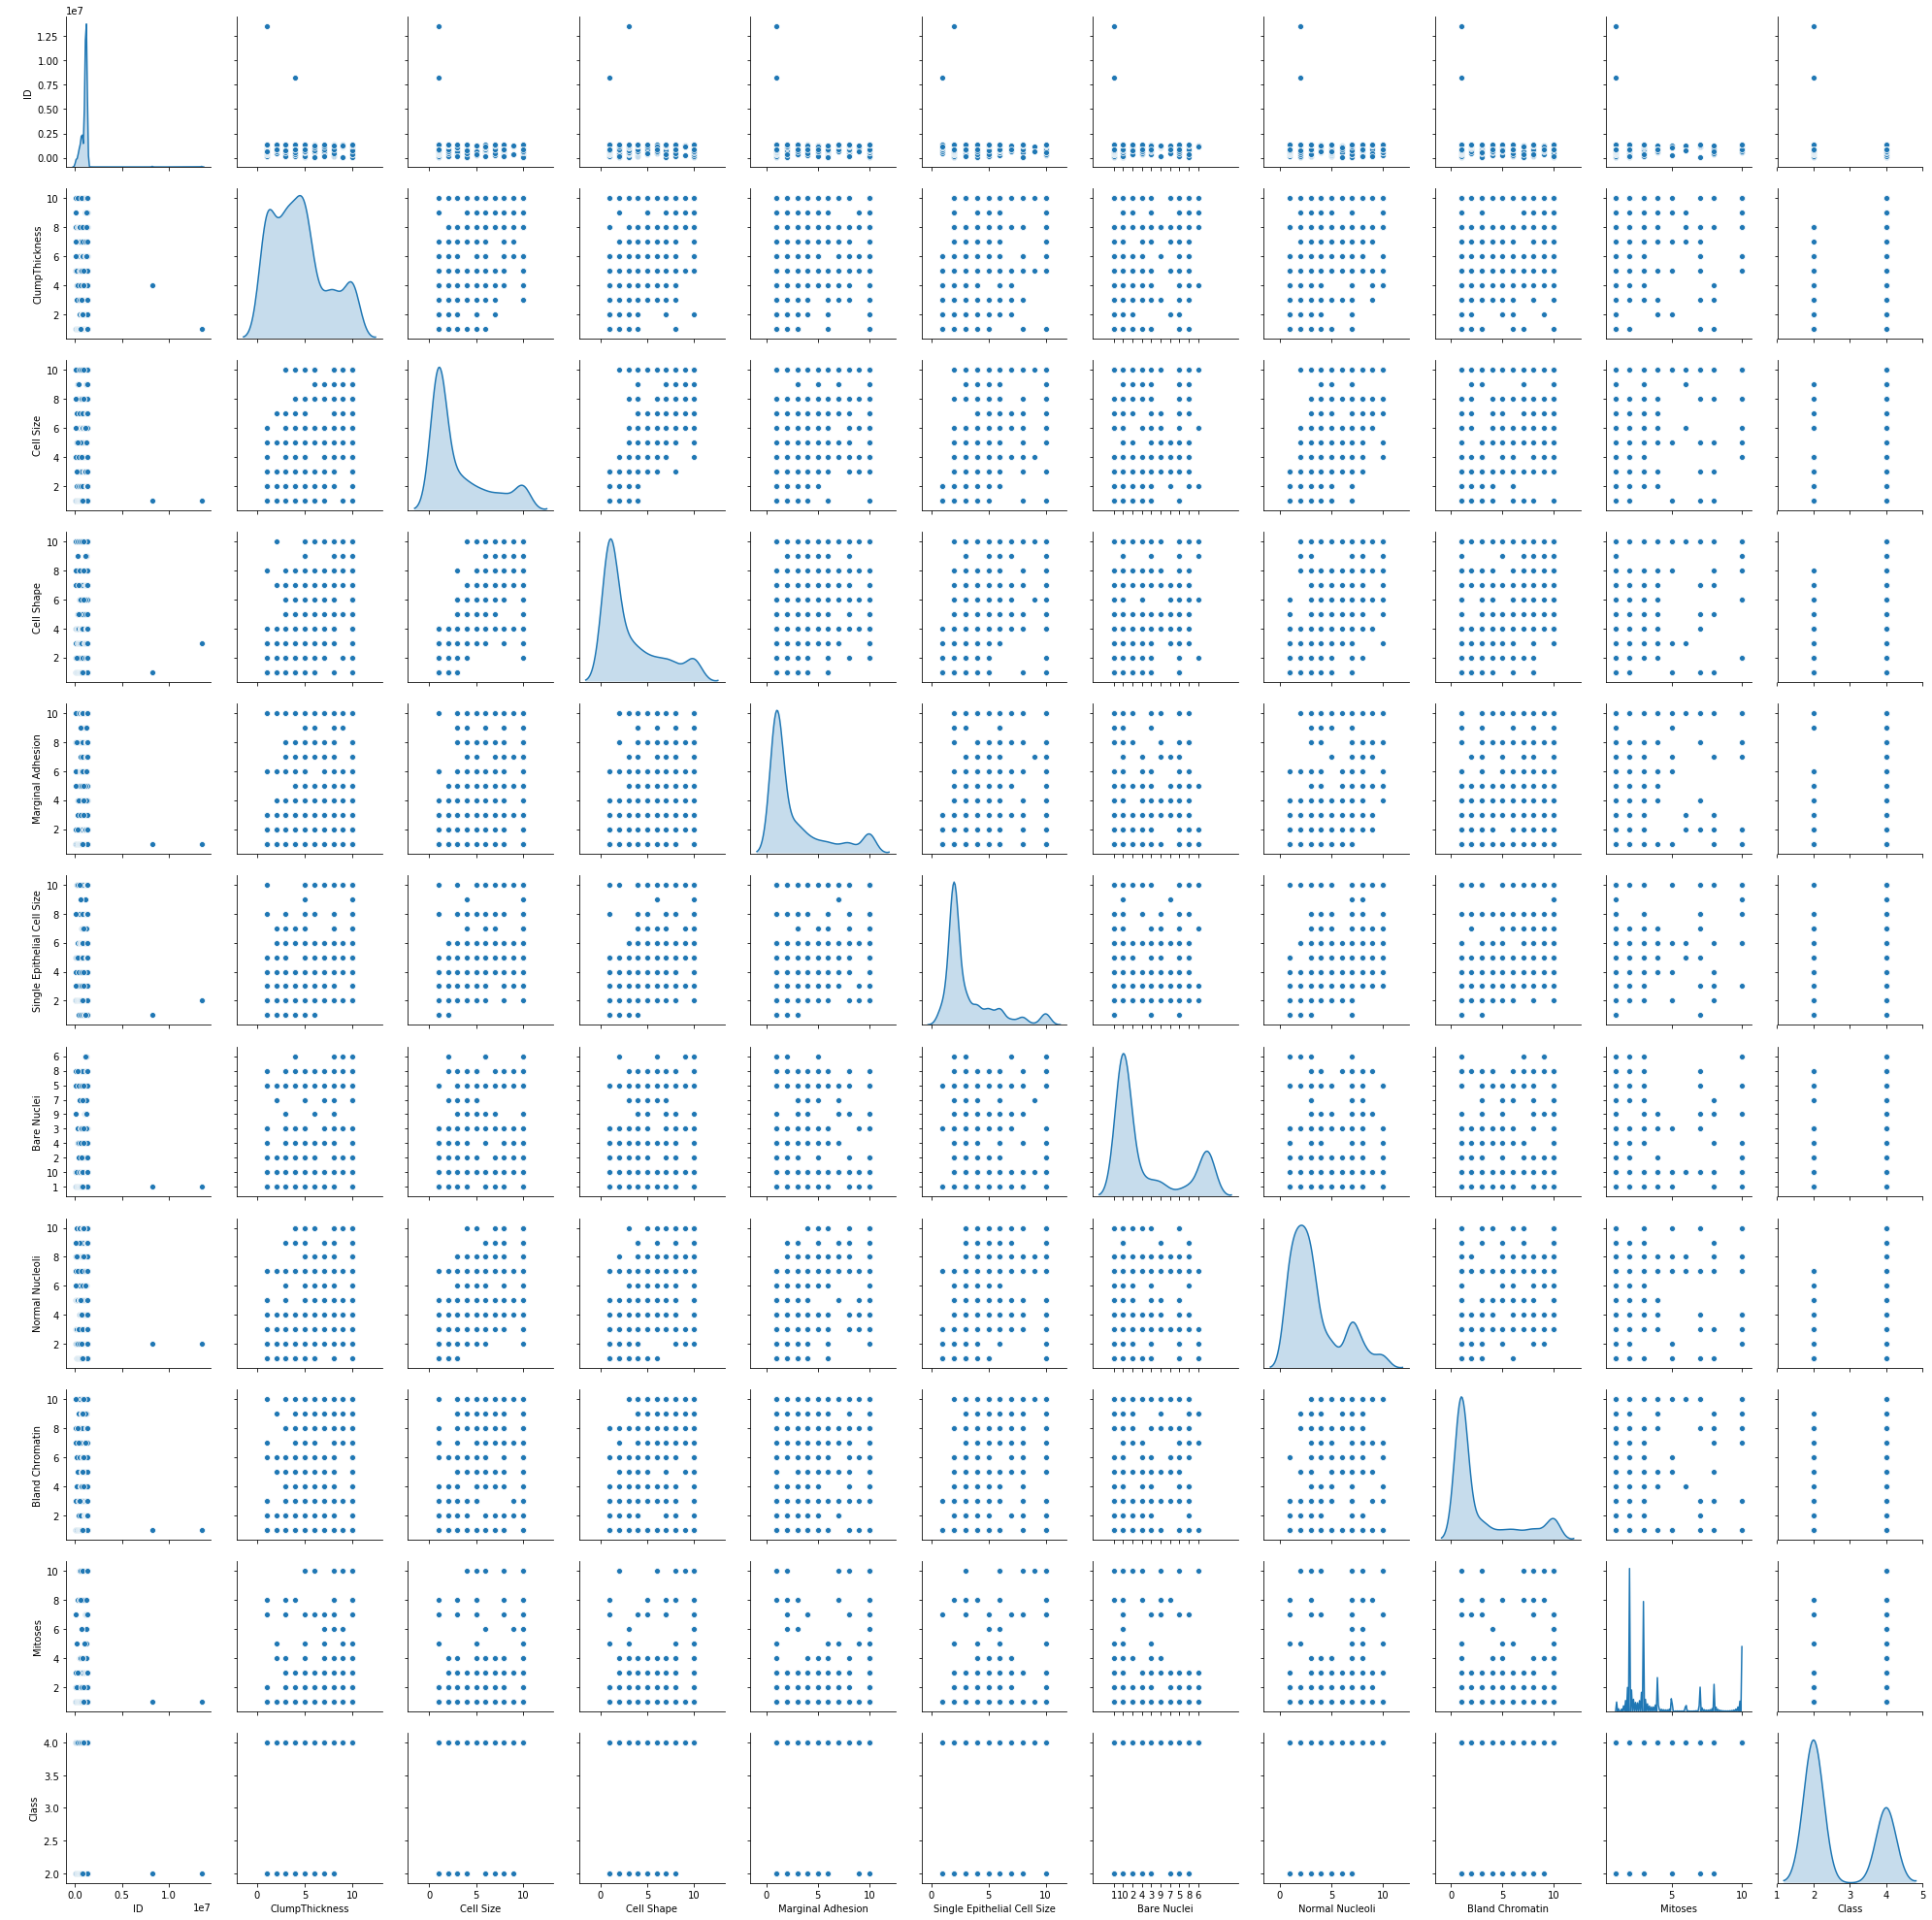

In [549]:
sns.pairplot(pca_df,diag_kind='kde')

(690, 10)

## Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [ ]:
pca_df.drop(labels='ID',inplace=True,axis=1)

In [561]:
pca_df.shape

(690, 10)

In [564]:
pca_df.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [566]:
import matplotlib.pyplot as plt

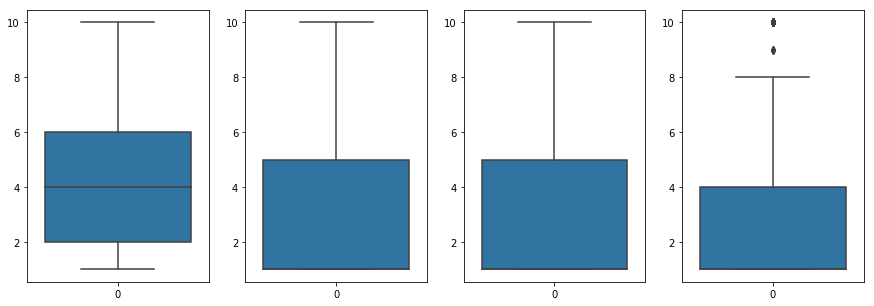

In [578]:
f, axs = plt.subplots(1,4, figsize=(15, 5))
sns.boxplot(data = pca_df['ClumpThickness'],ax = axs[0])
sns.boxplot(data = pca_df['Cell Size'], ax = axs[1])
sns.boxplot(data = pca_df['Cell Shape'],ax = axs[2])
sns.boxplot(data = pca_df['Marginal Adhesion'], ax = axs[3])

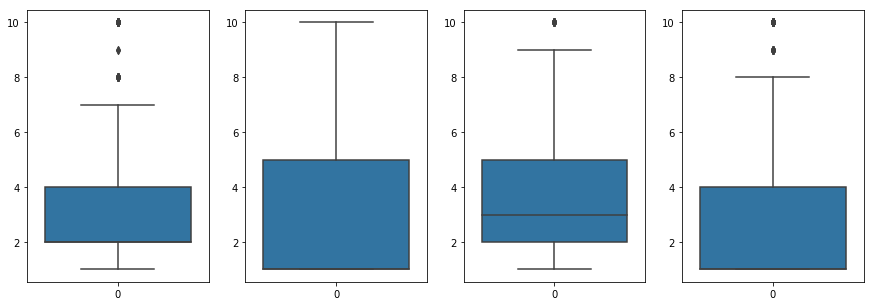

In [579]:
f, axs = plt.subplots(1,4, figsize=(15, 5))
sns.boxplot(data = pca_df['Single Epithelial Cell Size'],ax = axs[0])
sns.boxplot(data = pca_df['Bare Nuclei'], ax = axs[1])
sns.boxplot(data = pca_df['Normal Nucleoli'],ax = axs[2])
sns.boxplot(data = pca_df['Bland Chromatin'], ax = axs[3])

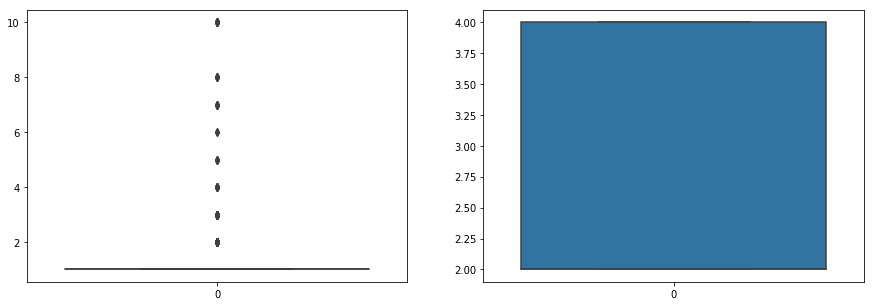

In [582]:
f, axs = plt.subplots(1,2, figsize=(15, 5))
sns.boxplot(data = pca_df['Mitoses'],ax = axs[0])
sns.boxplot(data = pca_df['Class'], ax = axs[1])

In [585]:
pca_df['Mitoses'].value_counts().sum

<bound method Series.sum of 1     571
2      35
3      32
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64>

In [587]:
pca_df['Mitoses']=pca_df['Mitoses'].map(lambda x: 1 if x>3 else x)

In [588]:
pca_df['Mitoses'].value_counts().sum

<bound method Series.sum of 1    623
2     35
3     32
Name: Mitoses, dtype: int64>

In [ ]:

#Q1 = air.quantile(0.25)
#Q3 = air.quantile(0.75)
#IQR = Q3 - Q1
#meanair = air.mean()
#low = Q1 - 1.5*IQR
#high = Q3 + 1.5*IQR

In [589]:
pc_df_test = pca_df.copy()

In [592]:
hi_marg = pca_df['Marginal Adhesion'].quantile(0.75)+ 1.5*(pca_df['Marginal Adhesion'].quantile(0.75)-pca_df['Marginal Adhesion'].quantile(0.25))

In [593]:
pca_df['Marginal Adhesion']=pca_df['Marginal Adhesion'].map(lambda x: hi_marg if x>hi_marg else x)

In [595]:
hi_epi = pca_df['Single Epithelial Cell Size'].quantile(0.75)+ 1.5*(pca_df['Single Epithelial Cell Size'].quantile(0.75)-pca_df['Single Epithelial Cell Size'].quantile(0.25))

In [596]:
pca_df['Single Epithelial Cell Size']=pca_df['Single Epithelial Cell Size'].map(lambda x: hi_epi if x>hi_epi else x)

In [598]:
hi_bland = pca_df['Bland Chromatin'].quantile(0.75)+ 1.5*(pca_df['Bland Chromatin'].quantile(0.75)-pca_df['Bland Chromatin'].quantile(0.25))

In [599]:
pca_df['Bland Chromatin']=pca_df['Bland Chromatin'].map(lambda x: hi_bland if x>hi_bland else x)

In [619]:
pca_df.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

## Q6 Create a covariance matrix for identifying Principal components

In [601]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [667]:
X = pca_df.iloc[:,0:9]
y = pca_df.iloc[:,9]

In [668]:
from sklearn.model_selection import train_test_split

In [669]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [670]:
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

## Q7 Identify eigen values and eigen vector

In [671]:
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)


e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[1.00181488 0.64190805 0.65110275 0.50217331 0.5505367  0.60033983
  0.54809482 0.51221185 0.29980024]
 [0.64190805 1.00181488 0.91133795 0.70787484 0.75965786 0.67549542
  0.75210516 0.70224196 0.27993658]
 [0.65110275 0.91133795 1.00181488 0.68740425 0.73808937 0.69913939
  0.72886798 0.6991932  0.27227348]
 [0.50217331 0.70787484 0.68740425 1.00181488 0.64001207 0.66752006
  0.67661699 0.61197225 0.24474122]
 [0.5505367  0.75965786 0.73808937 0.64001207 1.00181488 0.61933797
  0.64560845 0.66554145 0.26183757]
 [0.60033983 0.67549542 0.69913939 0.66752006 0.61933797 1.00181488
  0.66815873 0.57673776 0.33248047]
 [0.54809482 0.75210516 0.72886798 0.67661699 0.64560845 0.66815873
  1.00181488 0.64868284 0.25020413]
 [0.51221185 0.70224196 0.6991932  0.61197225 0.66554145 0.57673776
  0.64868284 1.00181488 0.30052447]
 [0.29980024 0.27993658 0.27227348 0.24474122 0.26183757 0.33248047
  0.25020413 0.30052447 1.00181488]]
Eigenvectors 
[[-0.30828554 -0.10179394  

##  Q8 Find variance and cumulative variance by each eigen vector

In [672]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [673]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 66.95531752  75.86914469  81.26735043  85.91519645  89.29594531
  92.3689895   95.28772685  97.80838731  99.10591322 100.        ]


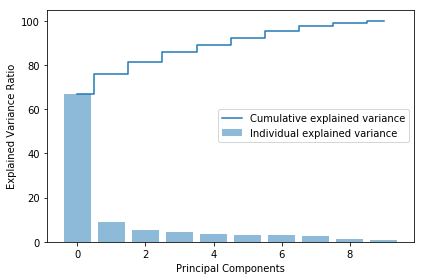

In [674]:
plt.figure(figsize=(6,4))
plt.bar(range(10), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(10), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [675]:
from sklearn.decomposition import PCA

In [717]:
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure(1, figsize=(8, 6))
#ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=8).fit(pca_df)
#ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_test,
#           cmap=plt.cm.Set1, edgecolor='k', s=40)
#plt.show()

In [721]:
#abc = pd.DataFrame(X_reduced.components_,columns=list(X))
X_reduced.components_

array([[ 3.10563766e-01,  4.14363585e-01,  4.02304476e-01,
         3.11370287e-01,  2.12516993e-01,  4.57883754e-01,
         3.03285177e-01,  3.30539650e-01,  2.31585360e-02,
         1.28284598e-01],
       [ 2.61419671e-02,  3.14966837e-01,  2.51781928e-01,
        -6.29199483e-02,  1.26987703e-01, -8.29042443e-01,
         6.74038081e-02,  3.51621623e-01, -9.36545159e-03,
        -3.24566011e-02],
       [-9.04282976e-01,  6.33118572e-02,  9.31479354e-03,
         3.39744170e-01,  8.46947874e-02,  6.91095603e-02,
         1.49212401e-01,  1.65057304e-01, -1.84922189e-02,
        -3.08461880e-02],
       [-3.12362081e-02,  3.50976772e-01,  2.95584853e-01,
         2.61987130e-01,  1.69863384e-02, -1.46356631e-01,
         2.05050004e-02, -8.34559006e-01, -2.88099473e-02,
        -1.95944207e-02],
       [-2.79882617e-01,  2.69844950e-01,  3.95903057e-01,
        -7.63051654e-01,  4.29888136e-02,  2.50870233e-01,
        -2.10720076e-01, -2.37617171e-02, -3.64806405e-03,
         9.

In [722]:
pd.DataFrame(X_reduced.components_,columns=list(pca_df))

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,0.310564,0.414364,0.402304,0.311370,0.212517,0.457884,0.303285,0.330540,0.023159,0.128285
1,0.026142,0.314967,0.251782,-0.062920,0.126988,-0.829042,0.067404,0.351622,-0.009365,-0.032457
2,-0.904283,0.063312,0.009315,0.339744,0.084695,0.069110,0.149212,0.165057,-0.018492,-0.030846
3,-0.031236,0.350977,0.295585,0.261987,0.016986,-0.146357,0.020505,-0.834559,-0.028810,-0.019594
4,-0.279883,0.269845,0.395903,-0.763052,0.042989,0.250870,-0.210720,-0.023762,-0.003648,0.009878
5,0.023626,0.059710,0.115315,0.339026,0.127050,0.039447,-0.910195,0.144190,0.024463,-0.009930
6,0.016431,0.115654,-0.419058,-0.129030,0.881633,0.008833,0.010961,-0.125472,0.025700,0.014709
7,0.000157,0.714031,-0.583106,-0.031773,-0.367165,0.060075,-0.076898,0.062717,0.028454,0.007920


## Q10 Find correlation between components and features

In [653]:
print(X_reduced.components_)

[[ 0.32782015  0.41811243  0.38953388  0.32210048  0.21491666  0.43328622
   0.30776467  0.36472636  0.0236653 ]
 [-0.73300179 -0.02127367 -0.07571937  0.34822434  0.04287549  0.54134922
  -0.01312516 -0.19937346 -0.02104421]
 [ 0.51360966 -0.33553926 -0.22518887 -0.11175757 -0.25527893  0.64484458
  -0.1123156  -0.25846567 -0.00275336]]


In [723]:
pd.DataFrame(X_reduced.components_,columns=list(pca_df))

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,0.310564,0.414364,0.402304,0.311370,0.212517,0.457884,0.303285,0.330540,0.023159,0.128285
1,0.026142,0.314967,0.251782,-0.062920,0.126988,-0.829042,0.067404,0.351622,-0.009365,-0.032457
2,-0.904283,0.063312,0.009315,0.339744,0.084695,0.069110,0.149212,0.165057,-0.018492,-0.030846
3,-0.031236,0.350977,0.295585,0.261987,0.016986,-0.146357,0.020505,-0.834559,-0.028810,-0.019594
4,-0.279883,0.269845,0.395903,-0.763052,0.042989,0.250870,-0.210720,-0.023762,-0.003648,0.009878
5,0.023626,0.059710,0.115315,0.339026,0.127050,0.039447,-0.910195,0.144190,0.024463,-0.009930
6,0.016431,0.115654,-0.419058,-0.129030,0.881633,0.008833,0.010961,-0.125472,0.025700,0.014709
7,0.000157,0.714031,-0.583106,-0.031773,-0.367165,0.060075,-0.076898,0.062717,0.028454,0.007920


## SVM

## Q1 Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [662]:
dia_df = pd.read_csv("pima-indians-diabetes.csv",sep=",")

In [663]:
# Eye ball the imported dataset

### Check dimension of dataset

In [665]:
dia_df.shape

(768, 9)

## Q2 Check distribution of dependent variable, Outcome and plot it (1 Marks)

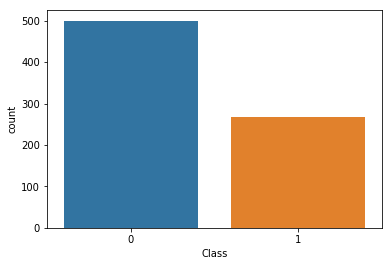

In [691]:
sns.countplot(dia_df['Class'])

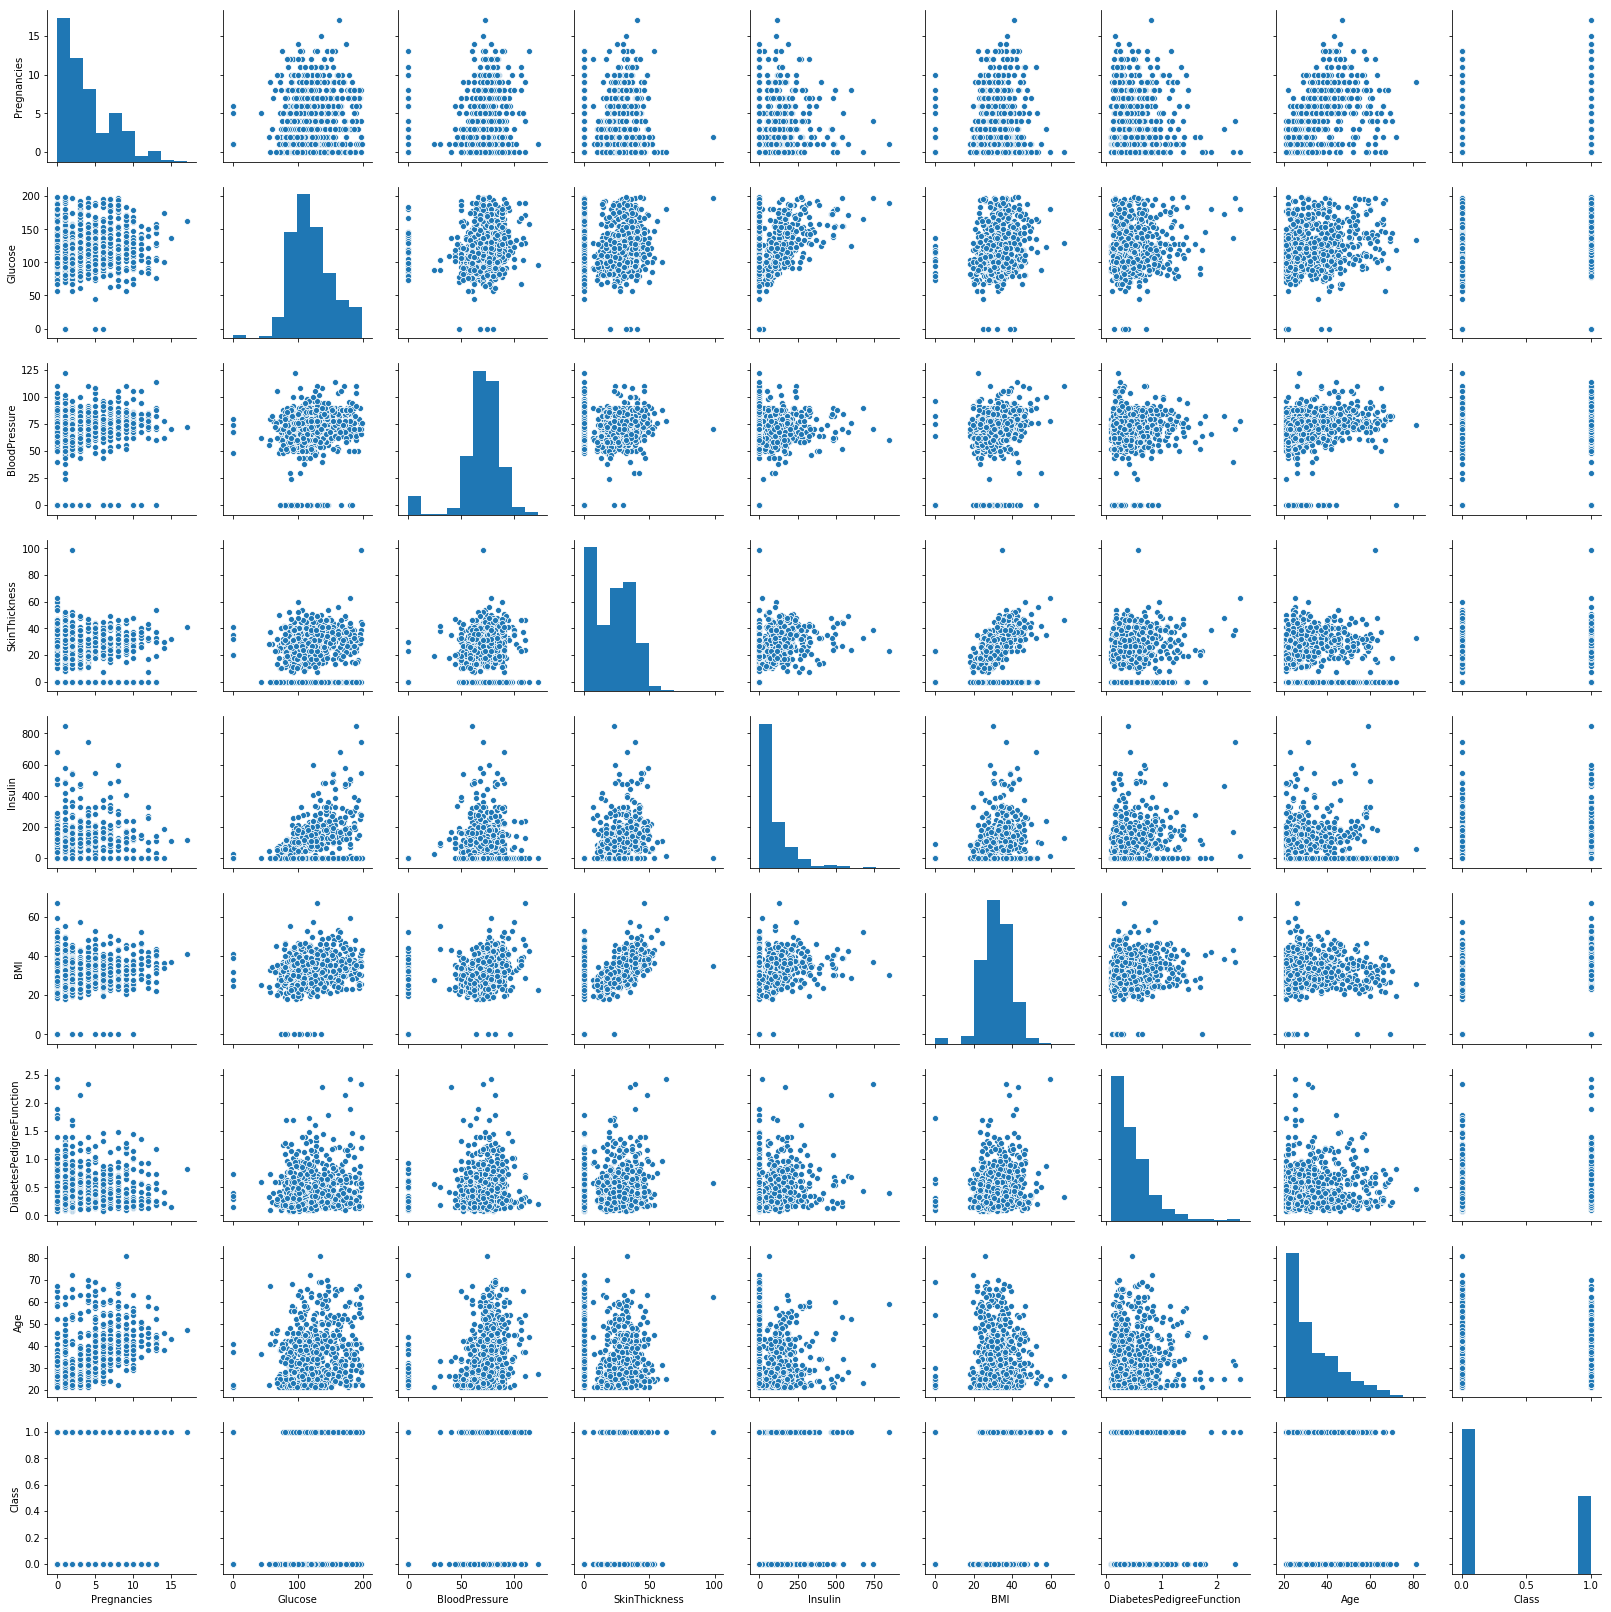

In [689]:
sns.pairplot(dia_df)

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [ ]:
# Check data types and info of dataset

## Q3 Check data distribution using summary statistics and provide your findings

In [681]:
dia_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Q4 Do correlation analysis and bivariate viualization with Insights(1 Marks)

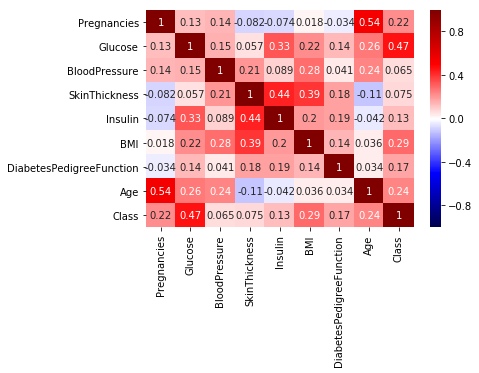

In [682]:
sns.heatmap(dia_df.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

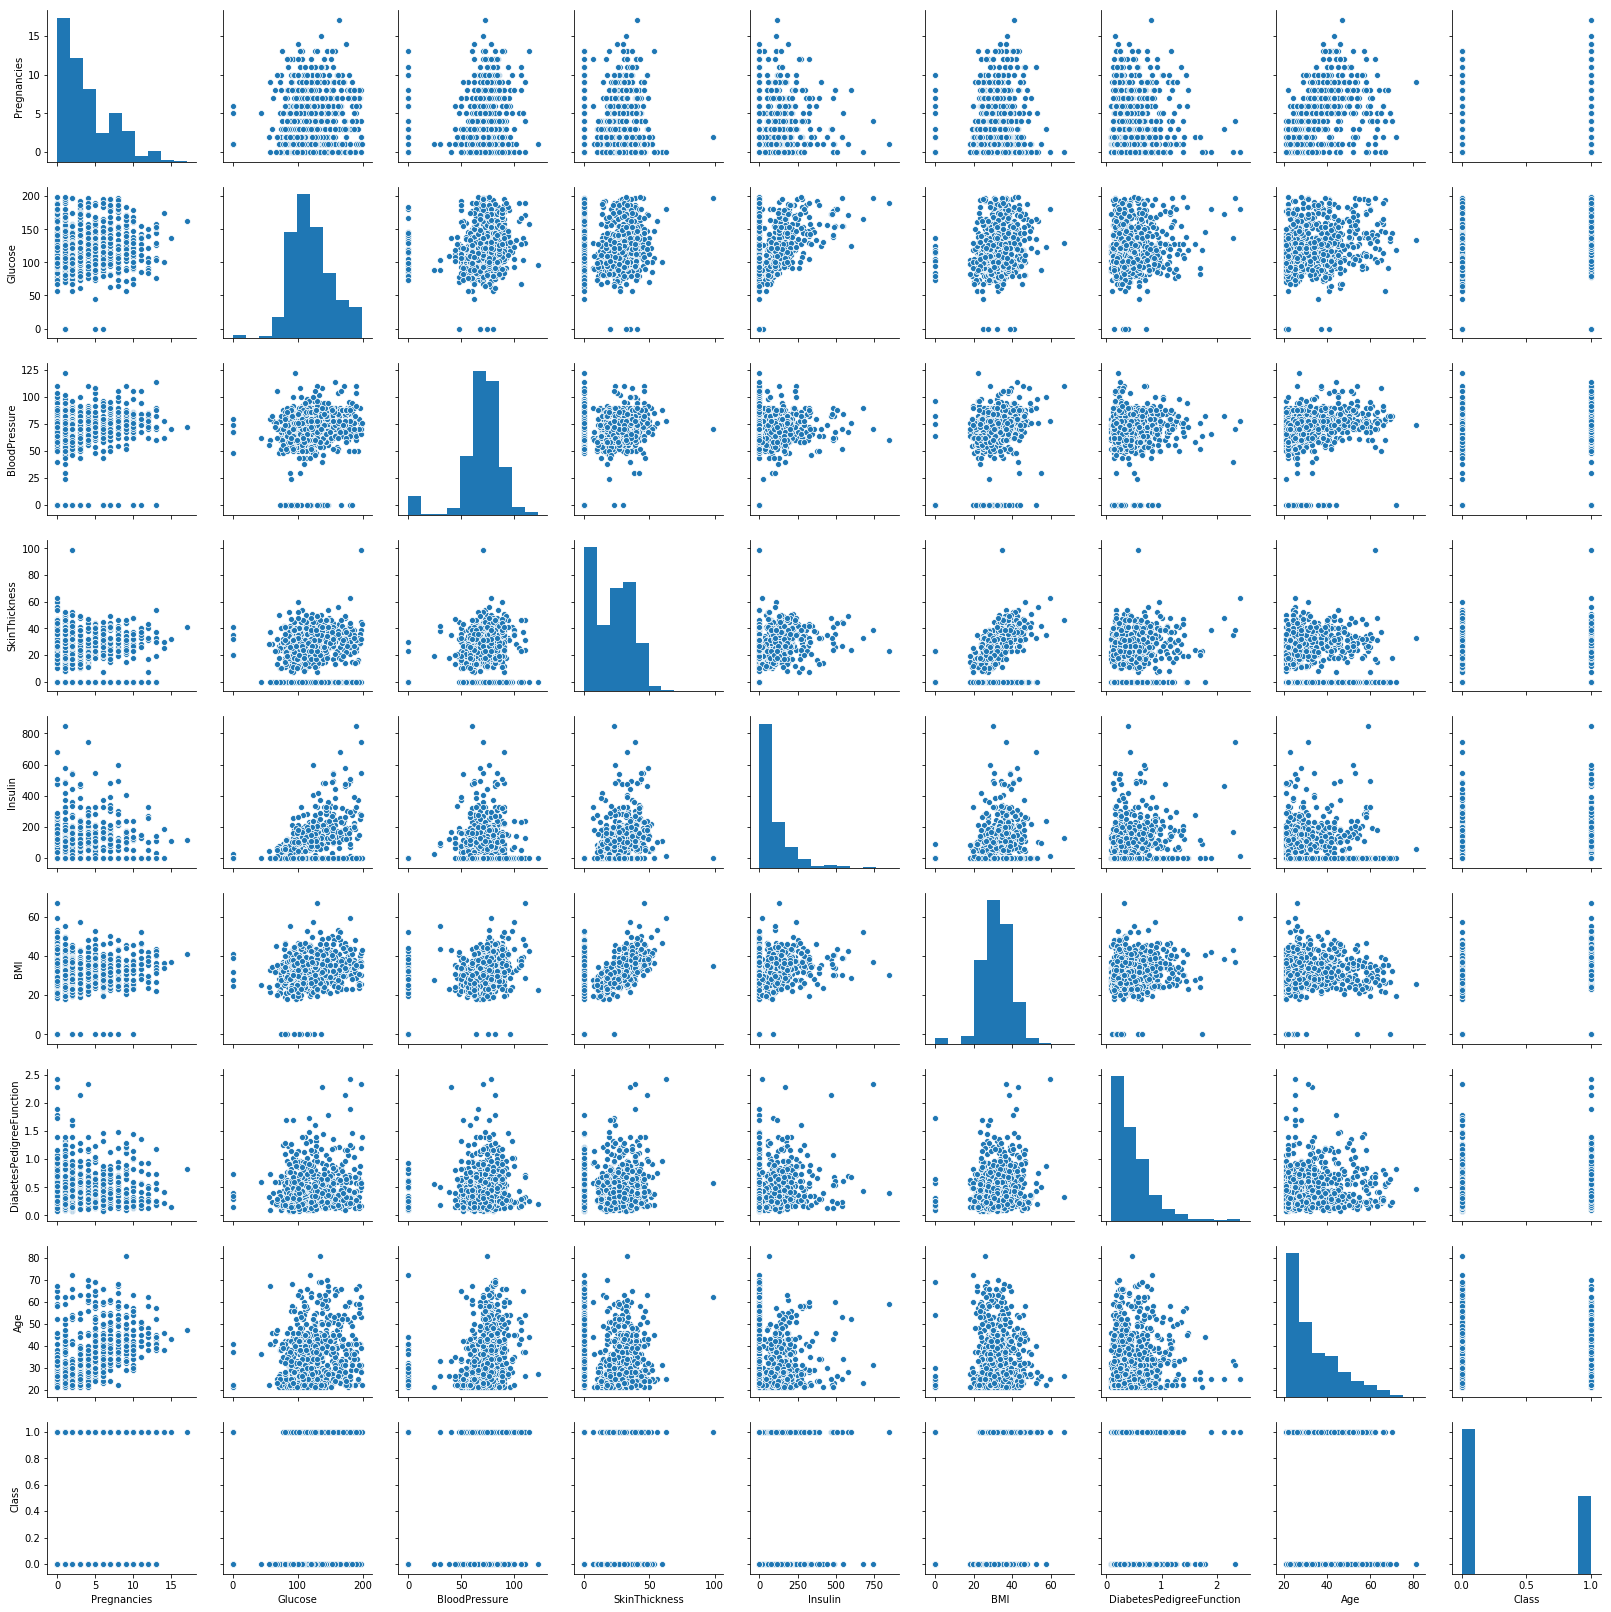

In [690]:
sns.pairplot(dia_df)

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [693]:
dia_df['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

In [695]:
dia_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

In [700]:
from sklearn.model_selection import train_test_split
X = dia_df.iloc[:,0:8]
y = dia_df.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=50,stratify = y )

## Q5 Train Support Vector Machine Model(1 Marks)

In [701]:
# use from sklearn.svm import SVC

In [702]:
from sklearn import svm

In [705]:
clf = svm.SVC()
clf.fit(X_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [706]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.6493506493506493


In [707]:
# overfit on training set

In [708]:
# your insights

## Q6 Scale the data points using MinMaxScaler ( 1 Marks)

In [709]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## Q7 Fit SVM Model on Scale data and give your observation( 1 Marks)

In [710]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [711]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7719869706840391
0.7402597402597403


#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [713]:
from sklearn.svm import SVC
clf = SVC(C=1000)    
clf.fit(X_train,y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8045602605863192
0.7662337662337663


### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [19]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [20]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [21]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [22]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [23]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
gs.best_score_ 

0.77777777777777779